## Calculating overlap between the eccentric waveform I generated and EccentricTD

with all parameters the same for both models.

Simona Miller, LIGO SURF 2018 (Last edited: July 31, 2018)

In [9]:
from pycbc.waveform import get_td_waveform, get_fd_waveform, td_waveform_to_fd_waveform
from pycbc.filter.matchedfilter import match
from pycbc.types.timeseries import TimeSeries
from pycbc.psd.analytical import aLIGODesignSensitivityP1200087

import numpy as np
import scipy as sp

%matplotlib inline

from matplotlib import pyplot as plt

In [10]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
rc('xtick', labelsize=14) 
rc('ytick', labelsize=14)

In [14]:
# Parameters
masses = np.arange(2,32,2) # solar mass units
ecc = np.arange(0.05, 0.5, 0.05) 
noecc = 1e-10
dt = 1.0/2048
#df = 0.01 
df = 0.236720007575 # delta_f from creating TimeSeries objects out of my waveform
f_lower = 20 # hz 
dist = 3.086e25 # 1000 megaparsec aka 3.086e25m
P0 = 0.1 # s

## My Waveforms

In [7]:
% run Eccentric_Waveform_Generator.ipynb

In [15]:
mine = {}

for mass in masses:
    for e in ecc:
    
        key = (mass, e)
        hp, hc, ts = GenerateEccentricWaveform(P0,e,mass,mass,dt,dist)
        
        # Convert to TimeSeries objects
        hp_TS = TimeSeries(hp, delta_t=dt)
        hc_TS = TimeSeries(hc, delta_t=dt)
        
        # Setting t=0 to be a 'merger'
        hp_TS_shifted = hp_TS.cyclic_time_shift(hp_TS.end_time)
        hc_TS_shifted = hc_TS.cyclic_time_shift(hc_TS.end_time)
        
        mine[key] = hp_TS_shifted, hc_TS_shifted
        
        print 'Generated waveform for m={}, e={}'.format(mass,e)

Generated waveform for m=2, e=0.05
Generated waveform for m=2, e=0.1
Generated waveform for m=2, e=0.15
Generated waveform for m=2, e=0.2
Generated waveform for m=2, e=0.25
Generated waveform for m=2, e=0.3
Generated waveform for m=2, e=0.35
Generated waveform for m=2, e=0.4
Generated waveform for m=2, e=0.45
Generated waveform for m=4, e=0.05
Generated waveform for m=4, e=0.1
Generated waveform for m=4, e=0.15
Generated waveform for m=4, e=0.2
Generated waveform for m=4, e=0.25
Generated waveform for m=4, e=0.3
Generated waveform for m=4, e=0.35
Generated waveform for m=4, e=0.4
Generated waveform for m=4, e=0.45
Generated waveform for m=6, e=0.05
Generated waveform for m=6, e=0.1
Generated waveform for m=6, e=0.15
Generated waveform for m=6, e=0.2
Generated waveform for m=6, e=0.25
Generated waveform for m=6, e=0.3
Generated waveform for m=6, e=0.35
Generated waveform for m=6, e=0.4
Generated waveform for m=6, e=0.45
Generated waveform for m=8, e=0.05
Generated waveform for m=8, e=0.

## EccentricTD Waveforms

In [16]:
ecctd = {}

for mass in masses: 
    for e in ecc:     
        
        # Using EccentricTD approximant
        hp, hc = get_td_waveform(approximant="EccentricTD",
                         mass1=mass,
                         mass2=mass,
                         delta_t=dt,
                         eccentricity=e,
                         delta_f=df,
                         f_lower=f_lower, 
                         distance=1) 
        
        key = (mass, e)
        
        ecctd[key] = (hp, hc)

## Calculating overlap between waveforms

In [22]:
from pycbc.psd import interpolate

overlap_data = []

print "\t\t\th+ \t\thx \n"

for mass in masses:
    for e in ecc:
    
        key = (mass, e)
        
        # My waveform
        hp1, hc1 = mine[key]
        
        # EccentricTD waveform
        hp2, hc2 = ecctd[key]
        hp2.resize(len(hp1))
        hc2.resize(len(hc1))
        
        psd = interpolate(psd, hp1.delta_f)
 
        # Calculating overlap for plus and cross polarizations
        hp_overlap = match(hp1, hp2, low_frequency_cutoff=f_lower)
        hc_overlap = match(hc1, hc2, low_frequency_cutoff=f_lower)
        
        data = [mass, e, hp_overlap[0], hc_overlap[0]]
        overlap_data.append(data)
        
        print "m =", mass, " e =", '{0:.4f}'.format(e), '\t', '{0:.8f}'.format(hp_overlap[0]), '\t', '{0:.8f}'.format(hc_overlap[0])
        
    print '\n'

			h+ 		hx 

m = 2  e = 0.0500 	0.10642326 	0.10639803
m = 2  e = 0.1000 	0.10558776 	0.10568898
m = 2  e = 0.1500 	0.10399841 	0.10424178
m = 2  e = 0.2000 	0.10189267 	0.10208742
m = 2  e = 0.2500 	0.10342296 	0.10355401
m = 2  e = 0.3000 	0.12263444 	0.12260176
m = 2  e = 0.3500 	0.15128908 	0.15147829
m = 2  e = 0.4000 	0.14640880 	0.14652419
m = 2  e = 0.4500 	0.15853178 	0.15799955


m = 4  e = 0.0500 	0.15775723 	0.15798880
m = 4  e = 0.1000 	0.15756624 	0.15775466
m = 4  e = 0.1500 	0.15627261 	0.15648317
m = 4  e = 0.2000 	0.15524804 	0.15567896
m = 4  e = 0.2500 	0.15009839 	0.14969318
m = 4  e = 0.3000 	0.16489291 	0.16485632
m = 4  e = 0.3500 	0.20161293 	0.20115540
m = 4  e = 0.4000 	0.19989317 	0.20123091
m = 4  e = 0.4500 	0.19826532 	0.19915910


m = 6  e = 0.0500 	0.20010259 	0.19977921
m = 6  e = 0.1000 	0.19895847 	0.19889158
m = 6  e = 0.1500 	0.19562780 	0.19653906
m = 6  e = 0.2000 	0.18909680 	0.18957261
m = 6  e = 0.2500 	0.19072817 	0.19232917
m = 6  e = 0.3000

In [23]:
mass = []
ecc = []
plus_overlap = []
cross_overlap = []

for i in range(len(overlap_data)):
    mass.append(overlap_data[i][0])
    ecc.append(overlap_data[i][1])
    plus_overlap.append(overlap_data[i][2])
    cross_overlap.append(overlap_data[i][3]) 
    
#print mass
#print ecc
#print plus_overlap
#print cross_overlap

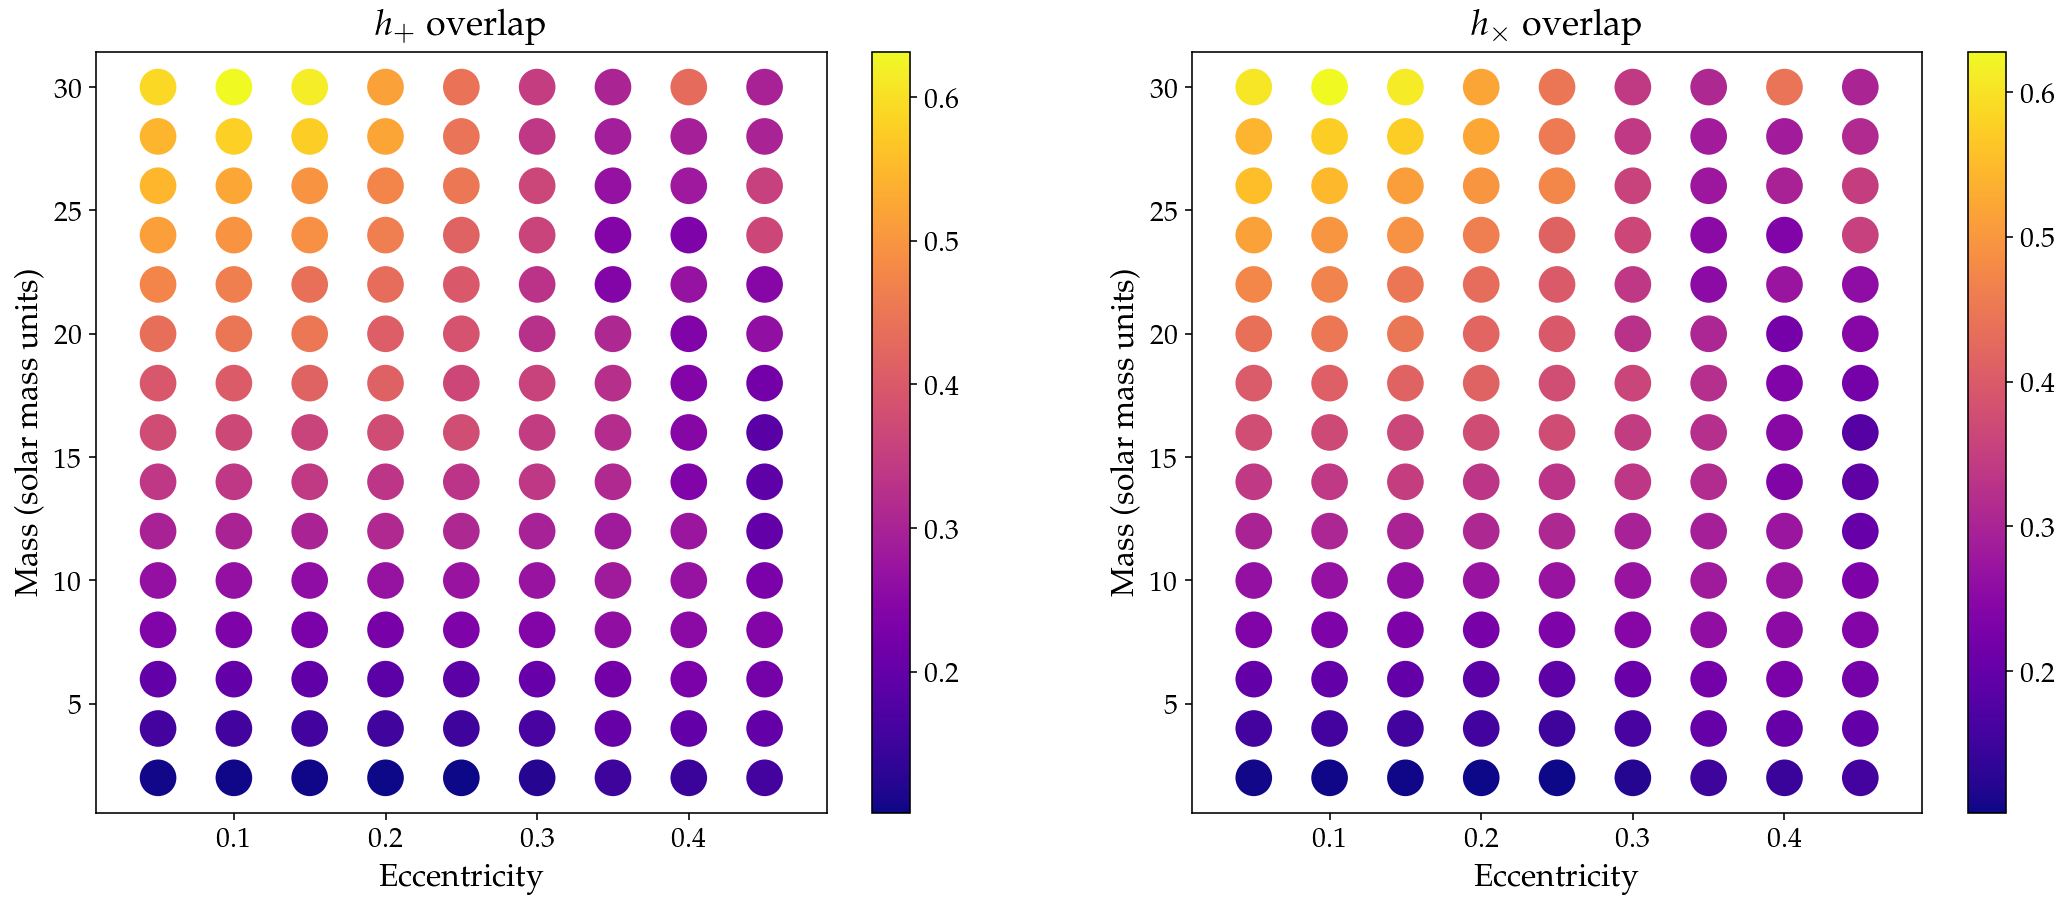

In [25]:
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.scatter(ecc, mass, s=300, c=plus_overlap, cmap='plasma')
plt.title('$h_+$ overlap', fontsize=18)
plt.ylabel('Mass (solar mass units)', fontsize=16)
plt.xlabel('Eccentricity', fontsize=16)
plt.colorbar()

plt.subplot(1,2,2)
plt.scatter(ecc, mass, s=300, c=cross_overlap, cmap='plasma')
plt.title(r'$h_\times$ overlap', fontsize=18)
plt.ylabel('Mass (solar mass units)', fontsize=16)
plt.xlabel('Eccentricity', fontsize=16)
plt.colorbar()

In [26]:
# Average overlaps

avg_plus = np.average(plus_overlap)
avg_cross = np.average(cross_overlap)

print avg_plus
print avg_cross

0.315044052398
0.316241602168
